#                          Titanic Tragedy Survivors/Deaths Prediction

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.
                                                                                                 The wreck of Titanic was discovered in 1985 (more than 70 years after the disaster) during a Franco-American expedition and US military mission. The ship was split in two and is gradually disintegrating at a depth of 12,415 feet (2,069.2 fathoms; 3,784 m). Thousands of artefacts have been recovered and displayed at museums around the world. Titanic has become one of the most famous ships in history, depicted in numerous works of popular culture, including books, folk songs, films, exhibits, and memorials. Titanic is the second largest ocean liner wreck in the world, only being surpassed by her sister ship HMHS Britannic, however, she is the largest sunk while in service as a liner, as Britannic was in use as a hospital ship at the time of her sinking. The final survivor of the sinking, Millvina Dean, aged two months at the time, died in 2009 at the age of 97.
                                                                                                  Let's do some visualisation and predict who have survived the tragedy. Here we are going to do this project in a clear linear way so that everyone could understand the process being undertaken.Here it goes.                                                                                         

# 1.Importing Library And Dataset
Let's import the necessary library and the data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data=pd.read_csv('train (1).csv')
test_data=pd.read_csv('test.csv')

Let us check the dataset for any missing values and also analyse if we have to do any data cleaning process for taking it to prediction

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

And yes ofcourse there are missing values and we need a lot of data cleaning to be done to get a good visualization and prediction.

# 2.Data Preprocessing And Cleaning

From the data insight we could  see that PassengerId is same as the index(not exactly but it just shows the index number of passengers).So we can remove the PassengerId column from our dataset.
Next comming to the ticket column we don't see anything unique that contributes for the survival of passengers. So we can delete that column from our dataset.
Cabin column have lot of missing data and also doesn't contribute to survival. So we can delete the Cabin column from our data

In [6]:
train_data.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)

In [7]:
train_data['Embarked'].isna().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [8]:
train_data.isna().any()

Survived    False
Pclass      False
Name        False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
dtype: bool

Still we can see missing data in columns like Age and places where people embarked. We can fill the age of the missing people with the help of mean of remaining people's age and fill the embarked people column with the most frequent embarked place.

In [9]:
imp=SimpleImputer(strategy='most_frequent')
train_data[['Embarked']]=imp.fit_transform(train_data[['Embarked']])

In [10]:
mean=train_data['Age'].mean()
train_data['Age'].fillna(mean,inplace=True)

With all the missing data filled we shall now change the varying age of people to a particular category. This we do by categorise the age from 0 to 12 as Child, 13 to 20 as Teen, 21 to 30 as Young, 31 to 40 as 30_adult, 41 to 50 as 40_adult and more than 51 as Elderly. By doing this we could get a clear insight of how many children and adults were saved. First lets round off the age.

In [11]:
train_data['Age']=np.ceil(train_data['Age'])

In [12]:
def get_age(val):
    age_classification={'Child':range(0,13),
                        'Teen':range(13,21),
                        'Young':range(21,31),
                        '30_adult':range(31,41),
                        '40_adult':range(41,51),
                        'Elderly':range(51,90)}
    for key,value in age_classification.items():
        if val in value:
            return key

In [13]:
for i in range(len(train_data)):
    train_data['Age'][i]=('{}'.format(get_age(train_data['Age'][i])))    

With now the Age column changed we shall see the names so that we could get anything common in names.

In [14]:
train_data['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

We could see that the titles stand common amidst the name. So we can use it for prediction.

In [15]:
def get_title(val):
    words=val.split()
    title={'Officer':['Capt.','Col.','Major.','Dr.','Rev.'],
          'Royalty':['Jonkheer.','Don.','Sir.','the Countess.','Lady.'],
          'Mrs':['Mme.','Ms.','Mrs.'],
          'Mr':['Mr.'],
          'Miss':['Mlle.','Miss.'],
          'Master':['Master.']}
    for key,value in title.items():
        for word in words:
            if word in value:
                return str(key)

In [16]:
train_data['Title']=np.NAN
for i in range(len(train_data)):
    train_data['Title'][i]=get_title(train_data['Name'][i])

In [17]:
train_data['Title'].isna().value_counts()

False    890
True       1
Name: Title, dtype: int64

We have got a new column called Title that display the title of the passengers. We could see that there is a miising value which means that the title was not given to that particular member. So lets deal with it later.
                                                                                                Now lets us get some information from SibSp and Parch. These are nothing but the number of siblings and parents that particular passenger have in the board. This is also important because those who are having small family managed to escape which gives us a good correlation for our prediction. Lets convert it into family member(Fam_mem) which tells the total number of family members on the board. Then we will convert the numbers into three columns stating the single passengers as singleton, 2 to 4 members as small family, more than 4 as large_family 

In [18]:
train_data['Fam_mem']=train_data['SibSp']+train_data['Parch']+1

In [19]:
def fam_size(val):
    fam={'Single':[1],
        'Small_family':[2,3,4],
        'large_family':[5,6,7,8,9,10,11]}
    for key,value in fam.items():
        if val in value:
            return key

In [20]:
for i in range(len(train_data)):
    train_data['Fam_mem'][i]=fam_size(train_data['Fam_mem'][i])

Now we can see how the data transformation made changes

In [21]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fam_mem
0,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,7.2500,S,Mr,Small_family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30_adult,1,0,71.2833,C,Mrs,Small_family
2,1,3,"Heikkinen, Miss. Laina",female,Young,0,0,7.9250,S,Miss,Single
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30_adult,1,0,53.1000,S,Mrs,Small_family
4,0,3,"Allen, Mr. William Henry",male,30_adult,0,0,8.0500,S,Mr,Single
5,0,3,"Moran, Mr. James",male,Young,0,0,8.4583,Q,Mr,Single
6,0,1,"McCarthy, Mr. Timothy J",male,Elderly,0,0,51.8625,S,Mr,Single
7,0,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,21.0750,S,Master,large_family
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young,0,2,11.1333,S,Mrs,Small_family
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teen,1,0,30.0708,C,Mrs,Small_family


In [22]:
train_data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       1
Fam_mem     0
dtype: int64

And still we have the missing value in title column as we mentioned earlier. We can replace the missing title with the most frequent title in the Title column.

In [23]:
def most_common(lst):
    data=Counter(lst)
    return data.most_common(1)[0][0]
frequent=most_common(train_data['Title'])

In [24]:
train_data['Title'].fillna(frequent,inplace=True)

In [25]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [26]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fam_mem
0,0,3,"Braund, Mr. Owen Harris",male,Young,1,0,7.2500,S,Mr,Small_family
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30_adult,1,0,71.2833,C,Mrs,Small_family
2,1,3,"Heikkinen, Miss. Laina",female,Young,0,0,7.9250,S,Miss,Single
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30_adult,1,0,53.1000,S,Mrs,Small_family
4,0,3,"Allen, Mr. William Henry",male,30_adult,0,0,8.0500,S,Mr,Single
5,0,3,"Moran, Mr. James",male,Young,0,0,8.4583,Q,Mr,Single
6,0,1,"McCarthy, Mr. Timothy J",male,Elderly,0,0,51.8625,S,Mr,Single
7,0,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,21.0750,S,Master,large_family
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Young,0,2,11.1333,S,Mrs,Small_family
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Teen,1,0,30.0708,C,Mrs,Small_family


Now we done with cleaning work let's convert the categorical columns like Sex,Age,Embarked,Title,Fam_mem to Ordinal Values which will be very usefull for going ahead with visualization.

In [27]:
oe=OrdinalEncoder()
train_data[['Embarked','Sex','Age','Title','Fam_mem']]=oe.fit_transform(train_data[['Embarked','Sex','Age','Title','Fam_mem']])

In [28]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fam_mem
0,0,3,"Braund, Mr. Owen Harris",1.0,5.0,1,0,7.2500,2.0,2.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.0,1,0,71.2833,0.0,3.0,1.0
2,1,3,"Heikkinen, Miss. Laina",0.0,5.0,0,0,7.9250,2.0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.0,1,0,53.1000,2.0,3.0,1.0
4,0,3,"Allen, Mr. William Henry",1.0,0.0,0,0,8.0500,2.0,2.0,0.0
5,0,3,"Moran, Mr. James",1.0,5.0,0,0,8.4583,1.0,2.0,0.0
6,0,1,"McCarthy, Mr. Timothy J",1.0,3.0,0,0,51.8625,2.0,2.0,0.0
7,0,3,"Palsson, Master. Gosta Leonard",1.0,2.0,3,1,21.0750,2.0,0.0,2.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.0,5.0,0,2,11.1333,2.0,3.0,1.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,4.0,1,0,30.0708,0.0,3.0,1.0


Done with the all the preprocessing and cleaning part let's visualize it to get some insights.

# 3.Visualizing

Let us first get the histogram of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A563F4348>,
      dtype=object)

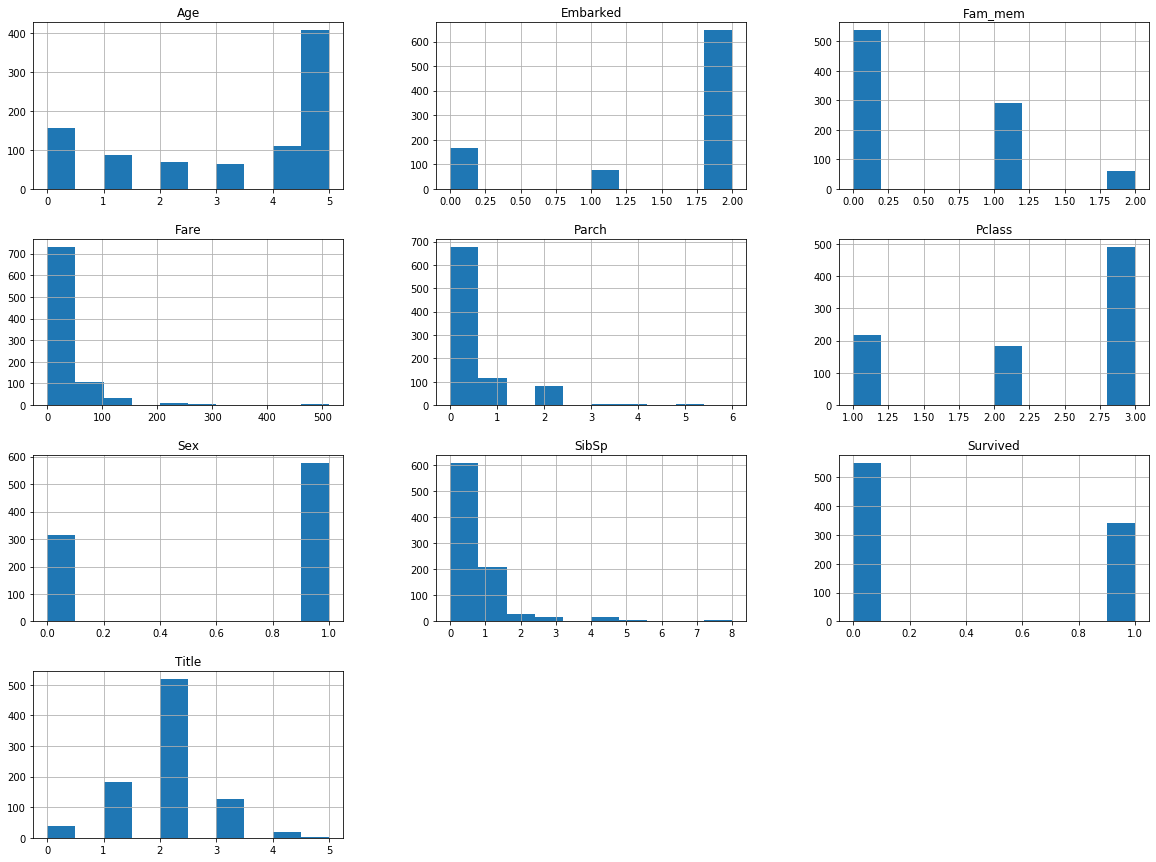

In [29]:
train_data.hist(bins=10,figsize=(20,15))

Let us check the correlation of each numerical data against the Survived column to see how far each feature contribute to our prediction.

In [30]:
corr_mat=train_data.corr()
corr_mat['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Fam_mem     0.108631
Parch       0.081629
SibSp      -0.035322
Title      -0.068776
Age        -0.096371
Embarked   -0.167675
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

Seems that the feature Sex contribute a lot than others in negative way. This shows that greater the value lesser the survival rate. In Sex feature male is given as 1 and female is given as 0. When the value of feature 'Sex' is '1' the possibility of survival is '0'(i.e If it is a 'male' passenger the probability that he survived is 'low'). Fare feature has given positive correlation. Let us visualize the important correlators in graphical form.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A5725CF48>,
      dtype=object)

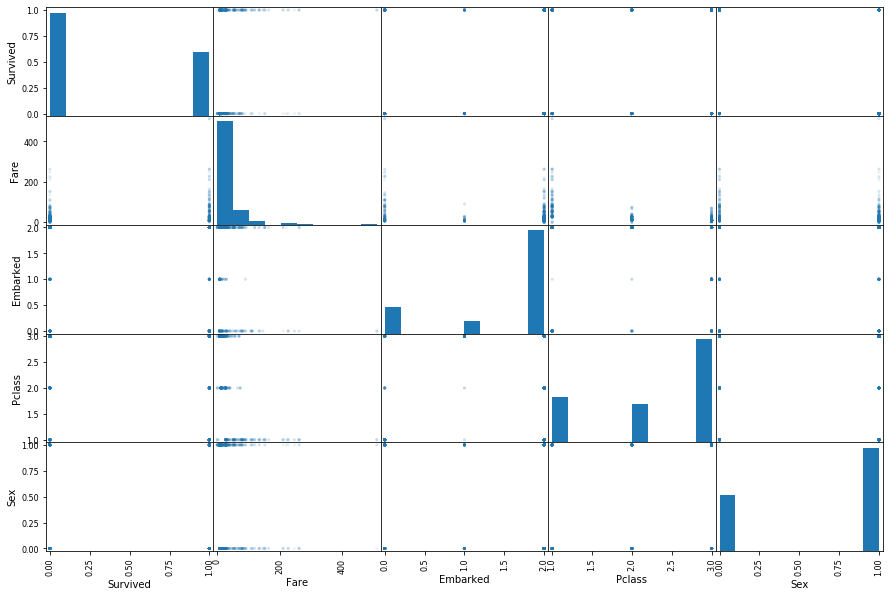

In [31]:
attributes=['Survived','Fare','Embarked','Pclass','Sex']
scatter_matrix(train_data[attributes],figsize=(15,10),alpha=0.1)

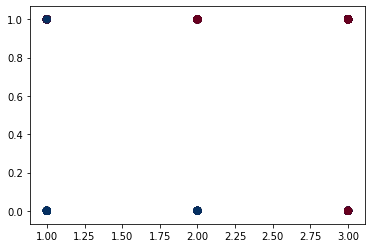

In [32]:
plt.scatter(train_data.iloc[:,1],train_data.iloc[:,3],c=train_data.iloc[:,0],s=50,cmap='RdBu')

Since it is a classification typed problem we couldn't get a good insight. But we could make a better visualization with bar and pie charts.

Let's visualise the ratio of survivability of men to women.

In [33]:
men_survived_truth=(((train_data['Sex']==1)&(train_data['Survived']==1)))
men_death_truth=(((train_data['Sex']==1)&(train_data['Survived']==0)))
women_survived_truth=(((train_data['Sex']==0)&(train_data['Survived']==1)))
women_death_truth=(((train_data['Sex']==0)&(train_data['Survived']==0)))
men_survived=men_survived_truth.value_counts()
men_death=men_death_truth.value_counts()
women_survived=women_survived_truth.value_counts()
women_death=women_death_truth.value_counts()
men=[men_survived[1],men_death[1]]
women=[women_survived[1],women_death[1]]

In [34]:
men_ratio=[(men[0]/(men[0]+men[1]))*100,(men[1]/(men[0]+men[1]))*100]
print(men_ratio)
women_ratio=[(women[0]/(women[0]+women[1]))*100,(women[1]/(women[0]+women[1]))*100]
print(women_ratio)

[18.890814558058924, 81.10918544194108]
[74.20382165605095, 25.796178343949045]


Text(0.5, 1.0, 'Women Ratio')

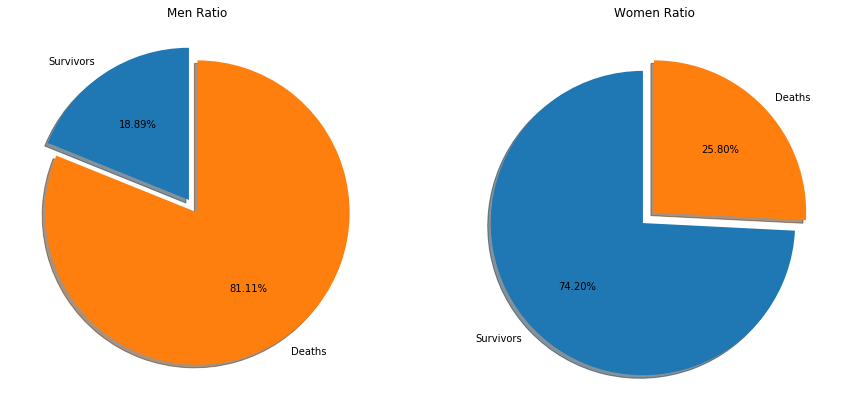

In [35]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
explode=(0.1,0)
ax[0].pie(men_ratio,explode=explode,labels=['Survivors','Deaths'],autopct='%1.2f%%',shadow=True,startangle=90)
ax[0].set_title('Men Ratio')
ax[1].pie(women_ratio,explode=explode,labels=['Survivors','Deaths'],autopct='%1.2f%%',shadow=True,startangle=90)
ax[1].set_title('Women Ratio')

It is clear that lot of men lost their life in this tragedy and lot of women suvived this tragedy.

Let us visualize how many men and women in each class managed to survive.

In [36]:
men_survivors=[]
men_death=[]
for i in range(1,4):
    Pclassmen_survived_truth=(((train_data['Sex']==1)&(train_data['Survived']==1)&(train_data['Pclass']==i)))
    Pclassmen_death_truth=(((train_data['Sex']==1)&(train_data['Survived']==0)&(train_data['Pclass']==i)))
    pclassmen_survivors=Pclassmen_survived_truth.value_counts()
    pclassmen_deaths=Pclassmen_death_truth.value_counts()
    men_survivors.append(pclassmen_survivors[1])
    men_death.append(pclassmen_deaths[1])
men=[men_survivors,men_death]

In [37]:
women_survivors=[]
women_death=[]
for i in range(1,4):
    Pclasswomen_survived_truth=(((train_data['Sex']==0)&(train_data['Survived']==1)&(train_data['Pclass']==i)))
    Pclasswomen_death_truth=(((train_data['Sex']==0)&(train_data['Survived']==0)&(train_data['Pclass']==i)))
    pclasswomen_survivors=Pclasswomen_survived_truth.value_counts()
    pclasswomen_deaths=Pclasswomen_death_truth.value_counts()
    women_survivors.append(pclasswomen_survivors[1])
    women_death.append(pclasswomen_deaths[1])
women=[women_survivors,women_death]

In [38]:
print(men)
print(women)

[[45, 17, 47], [77, 91, 300]]
[[91, 70, 72], [3, 6, 72]]


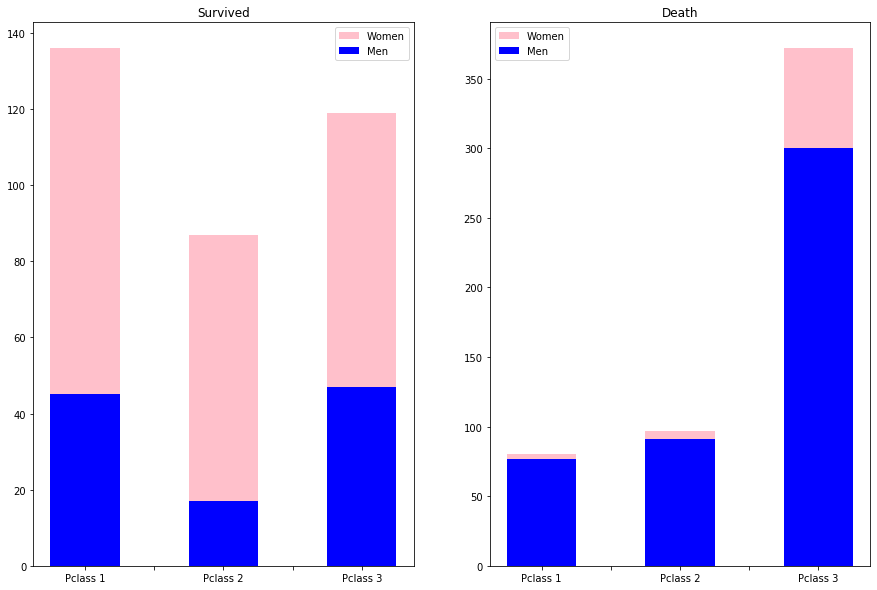

In [39]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
sur_death=['Survived','Death']
width=0.5
for i,axi in enumerate(ax.flat):
    N=3
    ind=[x for x in np.arange(1,N+1)]
    axi.bar(ind,women[i],width,label='Women',bottom=men[i],color='Pink')
    axi.bar(ind,men[i],width,label='Men',color='Blue')
    axi.set_xticklabels(['0','Pclass 1','','Pclass 2','','Pclass 3'])
    axi.set_title(sur_death[i])
    axi.legend()

It's clearly evident that almost all women from Pclass1 and Pclass2 managed to survive.

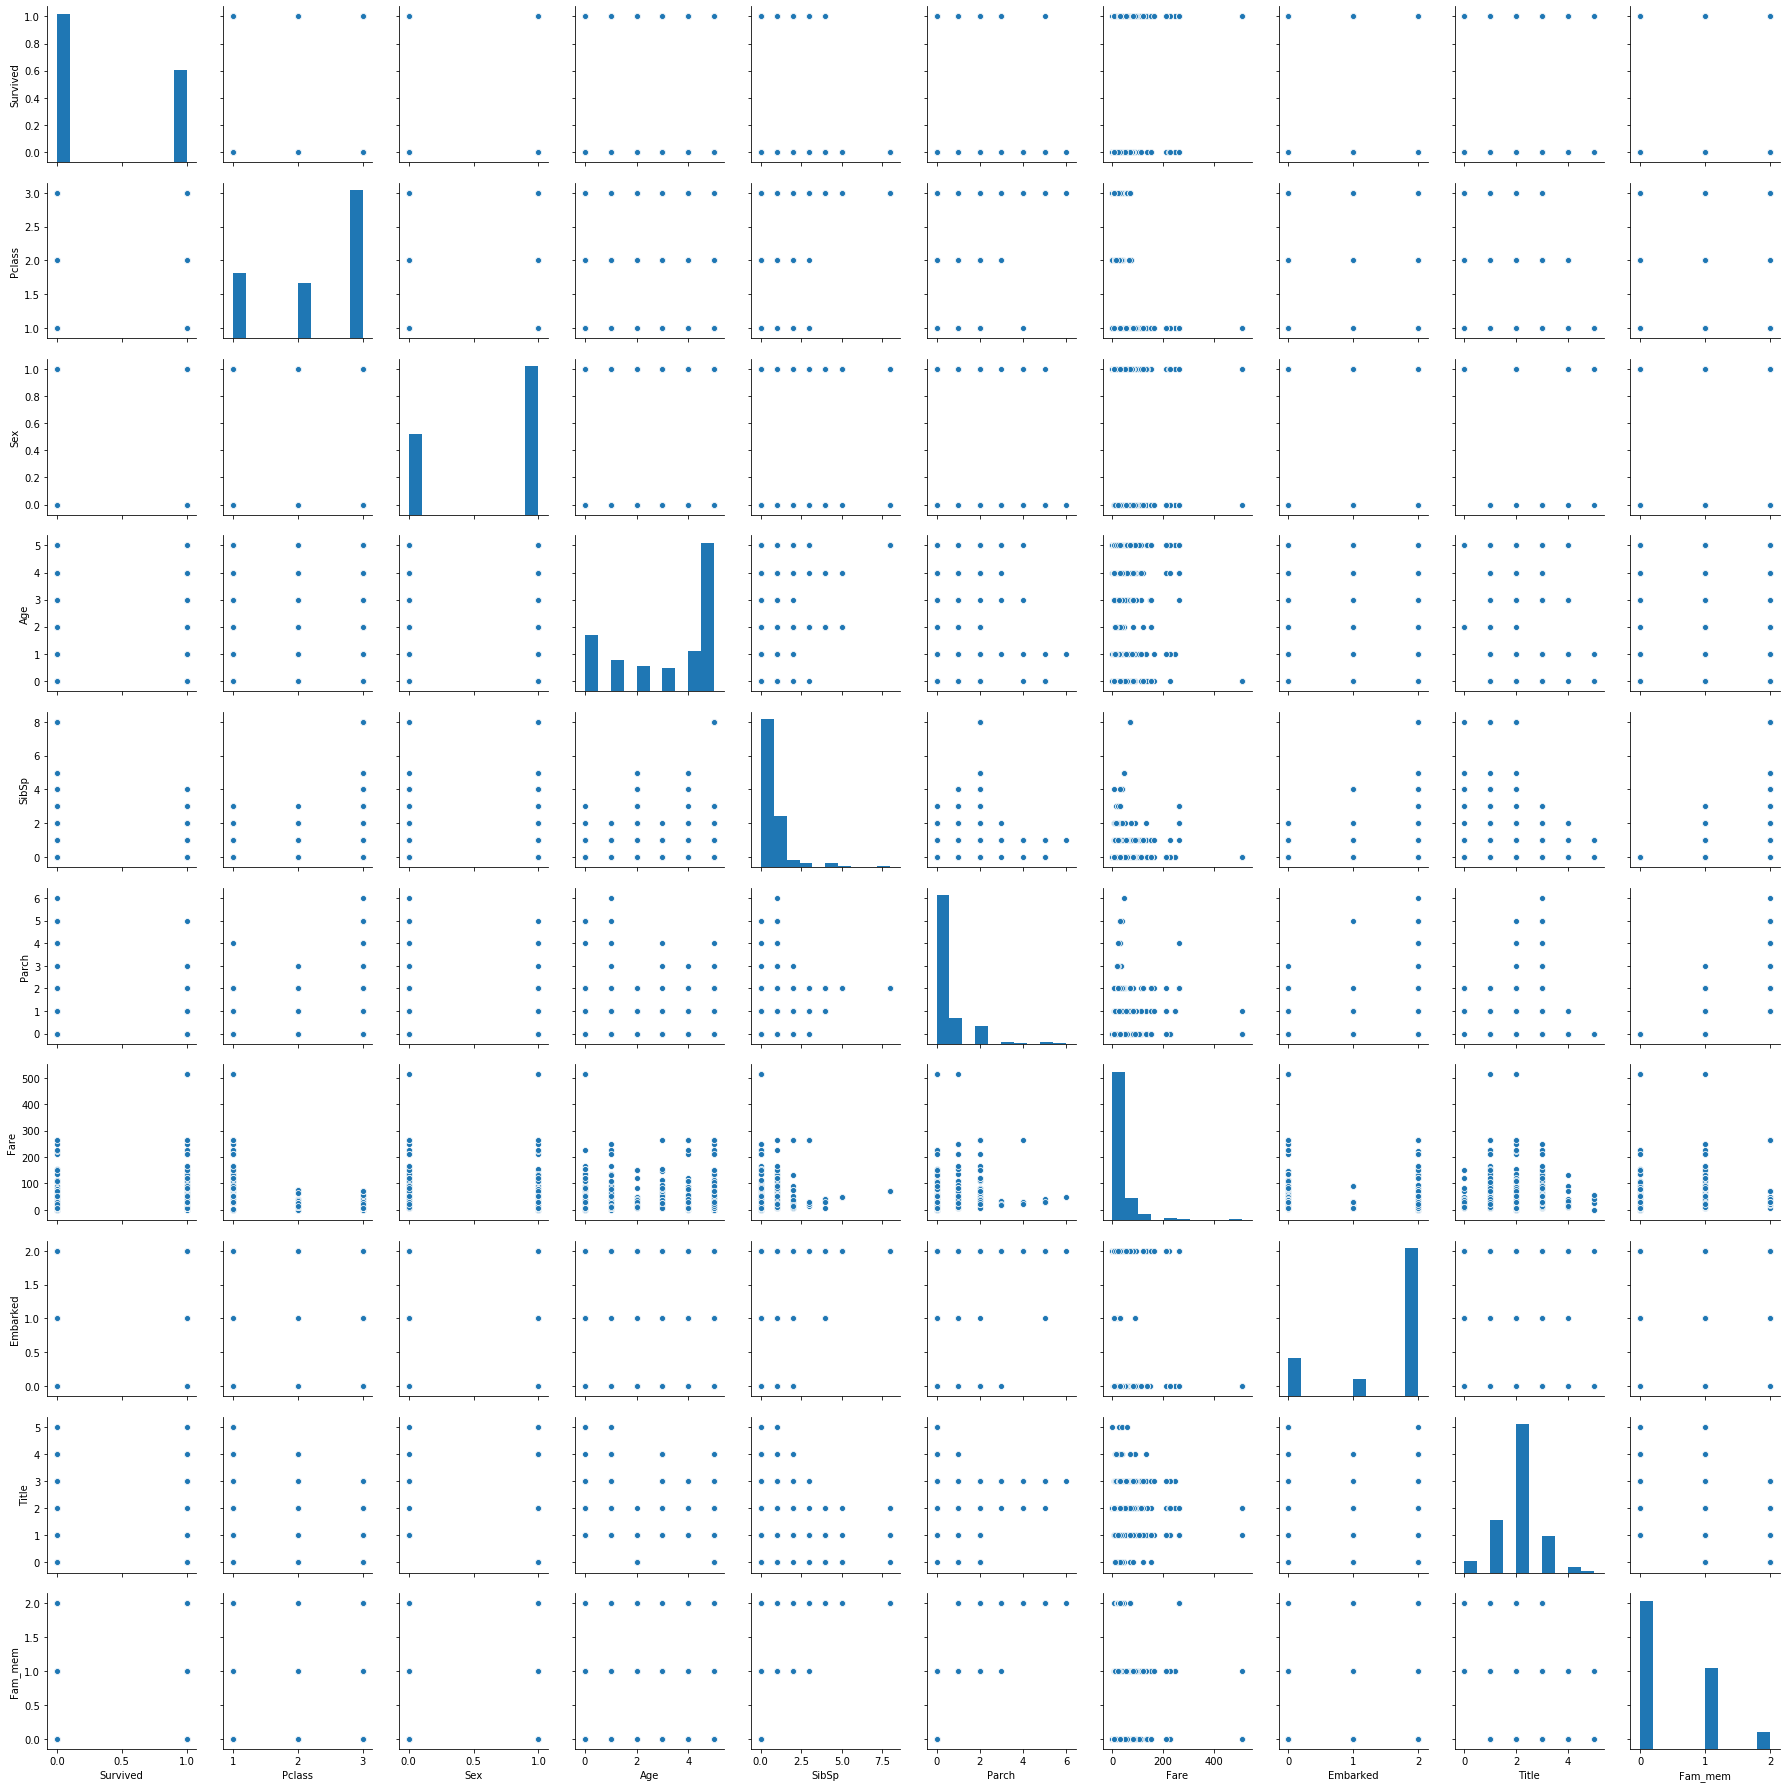

In [40]:
sns.pairplot(train_data)

Pair plot doesn't give a clear intution. Let's predict the survivability with respect to titles.

In [41]:
survivors=[]
death=[]
for i in range(0,6):
    title_survived_truth=(((train_data['Survived']==1)&(train_data['Title']==i)))
    title_death_truth=(((train_data['Survived']==0)&(train_data['Title']==i)))
    title_survived=title_survived_truth.value_counts()
    title_death=title_death_truth.value_counts()
    survivors.append(title_survived[1])
    death.append(title_death[1])
title_sur_death=[survivors,death]
title_sur_death

[[23, 129, 82, 101, 5, 2], [17, 55, 436, 26, 13, 2]]

In [42]:
oe.categories_

[array(['C', 'Q', 'S'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['30_adult', '40_adult', 'Child', 'Elderly', 'Teen', 'Young'],
       dtype=object),
 array(['Master', 'Miss', 'Mr', 'Mrs', 'Officer', 'Royalty'], dtype=object),
 array(['Single', 'Small_family', 'large_family'], dtype=object)]

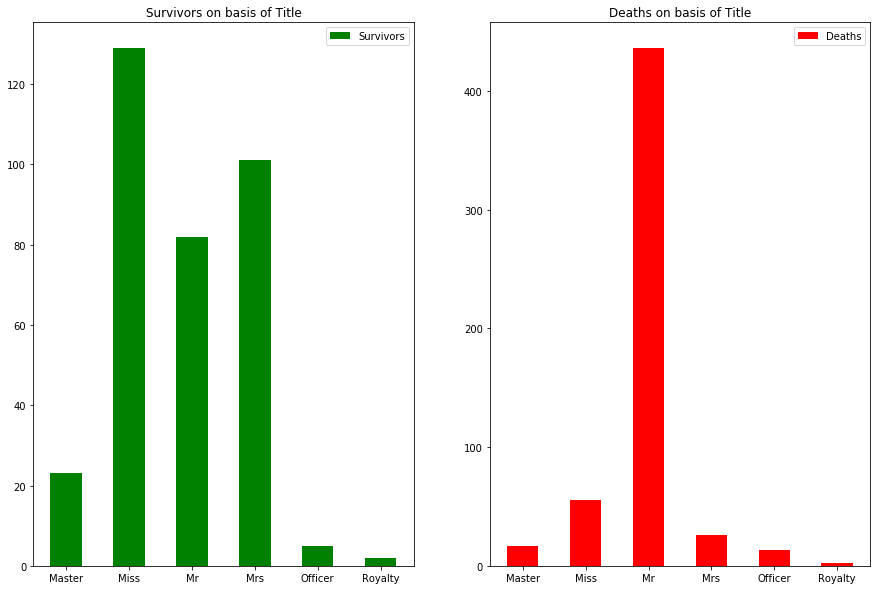

In [43]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
to_plot=[survivors,death]
name=['Survivors','Deaths']
color=['green','red']
for i,axi in enumerate(ax.flat):
    N=6
    ind=[x for x in np.arange(1,N+1)]
    axi.bar(ind,to_plot[i],width,label=('{}'.format(name[i])),color=color[i])
    axi.set_xticklabels(['0','Master','Miss','Mr','Mrs','Officer','Royalty'])
    axi.set_title('{} on basis of Title'.format(name[i]))
    axi.legend()

It seems Mr are very unfortunate.

Let us visualize the survivability based on Age.

In [44]:
survivors=[]
death=[]
for i in range(0,6):
    age_survived_truth=(((train_data['Survived']==1)&(train_data['Age']==i)))
    age_death_truth=(((train_data['Survived']==0)&(train_data['Age']==i)))
    age_survived=age_survived_truth.value_counts()
    age_death=age_death_truth.value_counts()
    survivors.append(age_survived[1])
    death.append(age_death[1])
age_sur_death=[survivors,death]
age_sur_death

[[69, 33, 40, 22, 42, 136], [86, 53, 29, 42, 68, 271]]

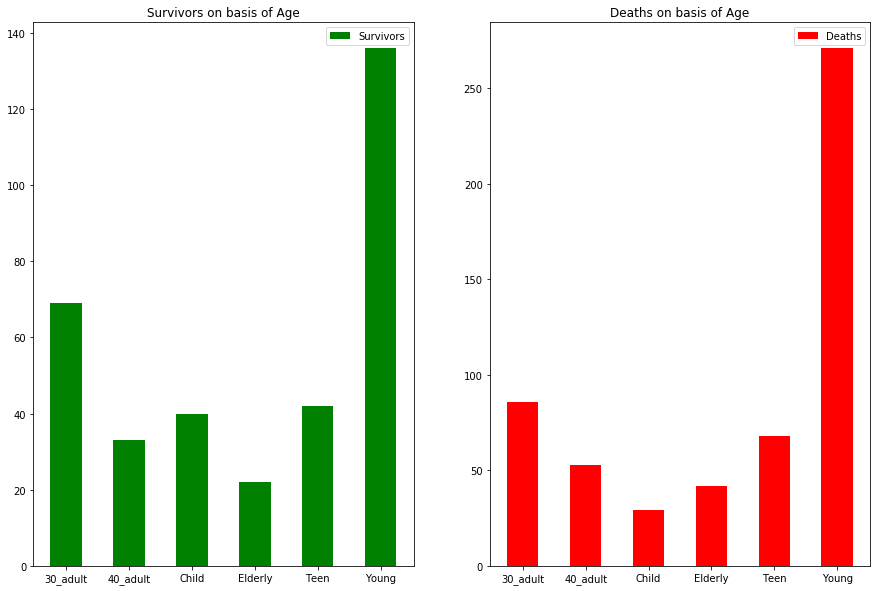

In [45]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
to_plot=[survivors,death]
name=['Survivors','Deaths']
color=['green','red']
for i,axi in enumerate(ax.flat):
    N=6
    ind=[x for x in np.arange(1,N+1)]
    axi.bar(ind,to_plot[i],width,label=('{}'.format(name[i])),color=color[i])
    axi.set_xticklabels(['0','30_adult','40_adult','Child','Elderly','Teen','Young'])
    axi.set_title('{} on basis of Age'.format(name[i]))
    axi.legend()

We may have heard that most children were saved but the data shows that about 30 children died in this tragedy. So sad....

Let's visualize on survivability basis of embarked places

In [46]:
embarked_survivor=[]
embarked_death=[]
for i in range(3):
    embarked_survived_truth=(((train_data['Survived']==1)&(train_data['Embarked']==i)))
    embarked_death_truth=(((train_data['Survived']==0)&(train_data['Embarked']==i)))
    embarked_survivors=embarked_survived_truth.value_counts()
    embarked_deaths=embarked_death_truth.value_counts()
    embarked_survivor.append(embarked_survivors[1])
    embarked_death.append(embarked_deaths[1])
embarked=[embarked_survivor,embarked_death]
embarked

[[93, 30, 219], [75, 47, 427]]

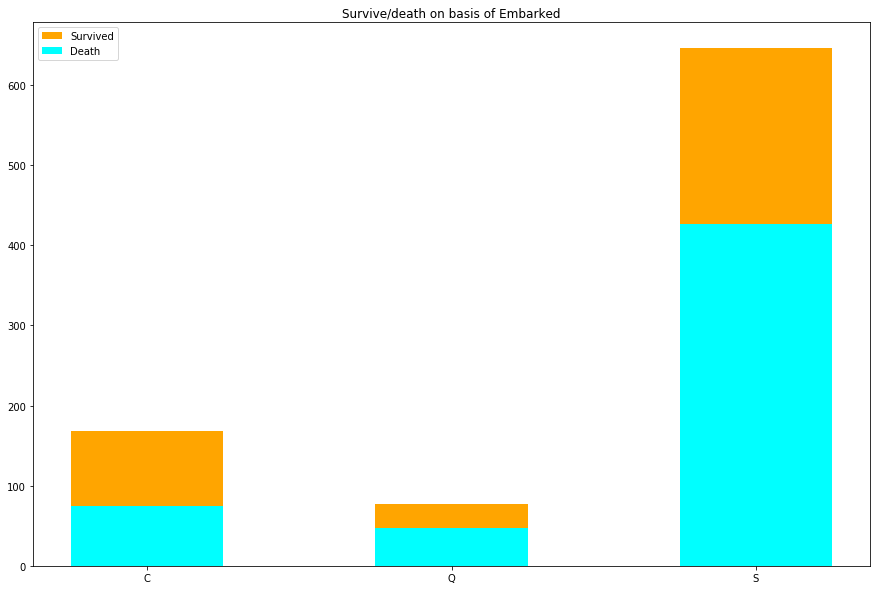

In [47]:
fig=plt.figure(figsize=(15,10))
N=3
ind=[x for x in np.arange(1,N+1)]
plt.bar(ind,embarked_survivor,width,label='Survived',bottom=embarked_death,color='Orange')
plt.bar(ind,embarked_death,width,label='Death',color='cyan')
plt.xticks(ind,['C','Q','S'])
plt.title('Survive/death on basis of Embarked')
plt.legend()

Seems that people who embarked from Queenstown are unfortunate.

Let us visualize the ratio of survivability based on the family size.

In [48]:
survivors=[]
death=[]
for i in range(0,3):
    fam_survived_truth=(((train_data['Survived']==1)&(train_data['Fam_mem']==i)))
    fam_death_truth=(((train_data['Survived']==0)&(train_data['Fam_mem']==i)))
    fam_survived=fam_survived_truth.value_counts()
    fam_death=fam_death_truth.value_counts()
    survivors.append(fam_survived[1])
    death.append(fam_death[1])
fam_sur_death=[survivors,death]
fam_sur_death

[[163, 169, 10], [374, 123, 52]]

In [49]:
sur_ratio=[(survivors[0]/(survivors[0]+survivors[1]+survivors[2]))*100,(survivors[1]/(survivors[0]+survivors[1]+survivors[2]))*100,
          (survivors[2]/(survivors[0]+survivors[1]+survivors[2]))*100]
death_ratio=[(death[0]/(death[0]+death[1]+death[2]))*100,(death[1]/(death[0]+death[1]+death[2]))*100,
            (death[2]/(death[0]+death[1]+death[2]))*100]
print(sur_ratio)
print(death_ratio)

[47.66081871345029, 49.41520467836257, 2.923976608187134]
[68.12386156648452, 22.404371584699454, 9.47176684881603]


Text(0.5, 1.0, 'Death Ratio')

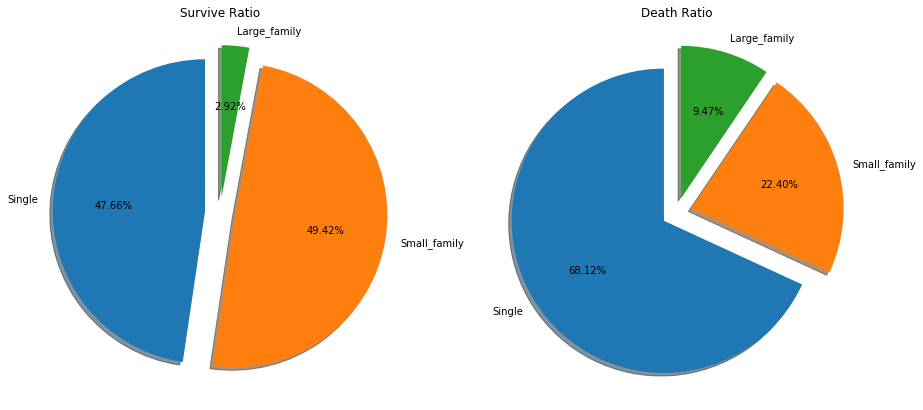

In [50]:
fig,ax=plt.subplots(1,2,figsize=(15,10))
explode=(0.1,0.1,0.1)
ax[0].pie(sur_ratio,explode=explode,labels=['Single','Small_family','Large_family'],autopct='%1.2f%%',shadow=True,startangle=90)
ax[0].set_title('Survive Ratio')
ax[1].pie(death_ratio,explode=explode,labels=['Single','Small_family','Large_family'],autopct='%1.2f%%',shadow=True,startangle=90)
ax[1].set_title('Death Ratio')

Seems that many small member family made their way out,but large family members could not make their way out

# 4.Preprocessing Part-2.0

Now that with the data getting ready for prediction we could make some more process so that our classifiers performs well on the dataset. The process includes getting dummies for features like Pclass,Sex,Age,Embarked,Title,Fam_mem. This is done because from our above visualization we could see some values in a feature contibute a lot to survivability. Eg: We can definitly say that a women from Pclass '2' has survivability of 95%. So this gives a good correlation than taking the overall feature of Pclass against survivability. 

In [51]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Fam_mem
0,0,3,"Braund, Mr. Owen Harris",1.0,5.0,1,0,7.2500,2.0,2.0,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.0,1,0,71.2833,0.0,3.0,1.0
2,1,3,"Heikkinen, Miss. Laina",0.0,5.0,0,0,7.9250,2.0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.0,1,0,53.1000,2.0,3.0,1.0
4,0,3,"Allen, Mr. William Henry",1.0,0.0,0,0,8.0500,2.0,2.0,0.0
5,0,3,"Moran, Mr. James",1.0,5.0,0,0,8.4583,1.0,2.0,0.0
6,0,1,"McCarthy, Mr. Timothy J",1.0,3.0,0,0,51.8625,2.0,2.0,0.0
7,0,3,"Palsson, Master. Gosta Leonard",1.0,2.0,3,1,21.0750,2.0,0.0,2.0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.0,5.0,0,2,11.1333,2.0,3.0,1.0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0.0,4.0,1,0,30.0708,0.0,3.0,1.0


In [52]:
preprocess_data=train_data.copy()

In [53]:
preprocess_data=pd.get_dummies(preprocess_data,columns=['Pclass','Sex','Age','Embarked','Title','Fam_mem'])

In [54]:
preprocess_data.head(10)

,Survived,Name,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0.0,Sex_1.0,...,Embarked_2.0,Title_0.0,Title_1.0,Title_2.0,Title_3.0,Title_4.0,Title_5.0,Fam_mem_0.0,Fam_mem_1.0,Fam_mem_2.0
0,0,"Braund, Mr. Owen Harris",1,0,7.2500,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,71.2833,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,1,"Heikkinen, Miss. Laina",0,0,7.9250,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,53.1000,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0,"Allen, Mr. William Henry",0,0,8.0500,0,0,1,0,1,...,1,0,0,1,0,0,0,1,0,0
5,0,"Moran, Mr. James",0,0,8.4583,0,0,1,0,1,...,0,0,0,1,0,0,0,1,0,0
6,0,"McCarthy, Mr. Timothy J",0,0,51.8625,1,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
7,0,"Palsson, Master. Gosta Leonard",3,1,21.0750,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,1
8,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,2,11.1333,0,0,1,1,0,...,1,0,0,0,1,0,0,0,1,0
9,1,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,30.0708,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
corr_mat=preprocess_data.corr()
corr_mat['Survived'].sort_values(ascending=False)

Survived        1.000000
Sex_0.0         0.543351
Title_3.0       0.344935
Title_1.0       0.332795
Pclass_1        0.285904
Fam_mem_1.0     0.279855
Fare            0.257307
Embarked_0.0    0.168240
Age_2.0         0.116691
Pclass_2        0.093349
Title_0.0       0.085221
Parch           0.081629
Age_0.0         0.057867
Title_5.0       0.016040
Embarked_1.0    0.003650
Age_1.0        -0.000079
Age_4.0        -0.001559
Age_3.0        -0.022932
Title_4.0      -0.031316
SibSp          -0.035322
Age_5.0        -0.093689
Fam_mem_2.0    -0.125147
Embarked_2.0   -0.149683
Fam_mem_0.0    -0.203367
Pclass_3       -0.322308
Sex_1.0        -0.543351
Title_2.0      -0.546521
Name: Survived, dtype: float64

As I mentioned we can see a lot of good positive and negative correlations are obtained. With the help of this our classifier does good job in predictiong the value.
Eventhough there are good correlators some doesn't have good correlation. Let's remove those as it does not going to affect our predictions. 

In [56]:
preprocess_data.drop(['Age_0.0','Title_5.0','Embarked_1.0','Age_1.0','Age_4.0','Age_3.0','Title_4.0','SibSp','Age_5.0',
                     'Parch','Title_0.0','Pclass_2','Name'],axis=1,inplace=True)

In [57]:
preprocess_data.shape

(891, 15)

After removing the unneccasary feature let's scale Fare feature as it has range of higher values.

In [58]:
scale=StandardScaler()
preprocess_data[['Fare']]=scale.fit_transform(preprocess_data[['Fare']])

In [59]:
preprocess_data.head()

,Survived,Fare,Pclass_1,Pclass_3,Sex_0.0,Sex_1.0,Age_2.0,Embarked_0.0,Embarked_2.0,Title_1.0,Title_2.0,Title_3.0,Fam_mem_0.0,Fam_mem_1.0,Fam_mem_2.0
0,0,-0.502445,0,1,0,1,0,0,1,0,1,0,0,1,0
1,1,0.786845,1,0,1,0,0,1,0,0,0,1,0,1,0
2,1,-0.488854,0,1,1,0,0,0,1,1,0,0,1,0,0
3,1,0.420730,1,0,1,0,0,0,1,0,0,1,0,1,0
4,0,-0.486337,0,1,0,1,0,0,1,0,1,0,1,0,0


Now let's seperate the data for training

In [60]:
preprocess_feature=preprocess_data.drop('Survived',axis=1)
preprocess_label=preprocess_data['Survived']

In [61]:
preprocess_feature

,Fare,Pclass_1,Pclass_3,Sex_0.0,Sex_1.0,Age_2.0,Embarked_0.0,Embarked_2.0,Title_1.0,Title_2.0,Title_3.0,Fam_mem_0.0,Fam_mem_1.0,Fam_mem_2.0
0,-0.502445,0,1,0,1,0,0,1,0,1,0,0,1,0
1,0.786845,1,0,1,0,0,1,0,0,0,1,0,1,0
2,-0.488854,0,1,1,0,0,0,1,1,0,0,1,0,0
3,0.420730,1,0,1,0,0,0,1,0,0,1,0,1,0
4,-0.486337,0,1,0,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.386671,0,0,0,1,0,0,1,0,0,0,1,0,0
887,-0.044381,1,0,1,0,0,0,1,1,0,0,1,0,0
888,-0.176263,0,1,1,0,0,0,1,1,0,0,0,1,0
889,-0.044381,1,0,0,1,0,1,0,0,1,0,1,0,0


In [62]:
preprocess_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# 5.Selecting the Classifier
Don't hurry!!!! For prediction we need a best classifier and good hyperparameters tuned for that particular classifier.
With the training dataset we are going to split it into train set and test set. The split will be of Stratified Sampling in which the test data will be taken in the correct ratio. With the help of this training and test set we are going to select the best classifier. We will also do grid search to get the fine hyperparameters to do the prediction perfectly.

In [63]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(preprocess_data,preprocess_data['Survived']):
    strat_preprocess_data=preprocess_data.loc[train_index]
    strat_preprocess_label=preprocess_data.loc[test_index]

In [64]:
X_train=strat_preprocess_data.drop('Survived',axis=1)
y_train=strat_preprocess_data['Survived']
X_test=strat_preprocess_label.drop('Survived',axis=1)
y_test=strat_preprocess_label['Survived']

In [65]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(712, 14)
(712,)
(179, 14)
(179,)


First lets go ahead with DECISION TREE......

In [66]:
tree=DecisionTreeClassifier(random_state=42,criterion='entropy',splitter='best')
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
accuracy_score(y_test,y_pred)

0.7932960893854749

It gives us accuracy of 79%. Lets fine tune hyperparameters.

In [67]:
param_grid={'max_depth':[2,3,4,5,6]}
grid_tree=GridSearchCV(tree,param_grid,cv=5)
grid_tree.fit(X_train,y_train)
y_pred=grid_tree.best_estimator_.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(grid_tree.best_params_)

0.8044692737430168
{'max_depth': 5}


It gives us 80% accuracy. That's ok. Let us visualize in the form of heat map.

Text(33.0, 0.5, 'predicted label')

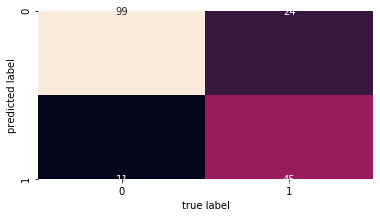

In [68]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

The classifier did its best. Lets try the same procedure for all other classifiers.

Now LOGISTIC REGRESSION......

In [69]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)
accuracy_score(y_test,y_pred)

0.8212290502793296

In [70]:
param_grid={'C':[0.0001,0.001,0.01,0.1,0.5],'penalty':['l1','l2']}
grid_log=GridSearchCV(log_reg,param_grid,cv=5)
grid_log.fit(X_train,y_train)
y_pred=grid_log.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(grid_log.best_params_)

0.8212290502793296
{'C': 0.5, 'penalty': 'l1'}


Text(33.0, 0.5, 'predicted label')

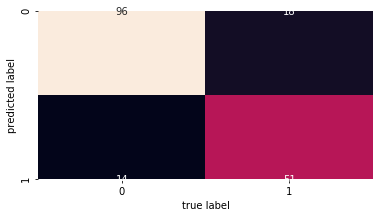

In [71]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

This performs even more better than Decision Tree.

Let's see RANDOM FOREST CLASSIFIER......

In [72]:
rfc=RandomForestClassifier(criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.7821229050279329

In [73]:
param_grid={'max_depth':[2,3,4,5,6],'n_estimators':[100,200,300,400,500]}
grid_forest=GridSearchCV(rfc,param_grid,cv=5)
grid_forest.fit(X_train,y_train)
y_pred=grid_forest.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(grid_forest.best_params_)

0.8212290502793296
{'max_depth': 4, 'n_estimators': 200}


Text(33.0, 0.5, 'predicted label')

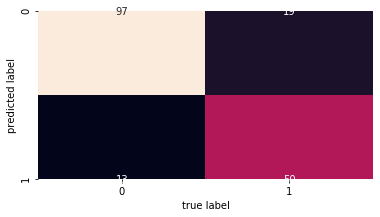

In [74]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,cbar=False,fmt='d')
plt.xlabel('true label')
plt.ylabel('predicted label')

With the fine tuned hyperparameters random forest does equal to logistic regression

Let us try SGD Classifier......

In [75]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
y_pred=sgd_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7932960893854749

In [76]:
param_grid={'penalty':['l1','l2'],'alpha':[0.0001,0.001,0.01,0.1],'max_iter':[1000,1500,2000,2500]}
grid_sgd=GridSearchCV(sgd_clf,param_grid,cv=5)
grid_sgd.fit(X_train,y_train)
y_pred=grid_sgd.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(grid_sgd.best_params_)

0.8156424581005587
{'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1'}


Text(33.0, 0.5, 'predicted label')

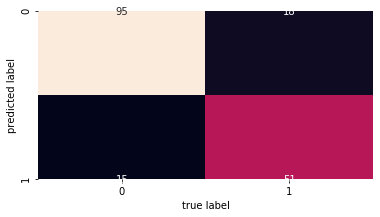

In [77]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

This also does the same as logistic regression and random forest.

Let us try SUPPORT VECTOR MACHINE........

In [78]:
svc_clf=SVC(kernel='rbf',random_state=42)
svc_clf.fit(X_train,y_train)
y_pred=svc_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8324022346368715

In [79]:
param_grid={'C':[1,2,3,4,5],'degree':[2,3,4,5,6],'gamma':['scale','auto']}
grid_svc=GridSearchCV(svc_clf,param_grid,cv=5)
grid_svc.fit(X_train,y_train)
y_pred=grid_svc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(grid_svc.best_params_)

0.8324022346368715
{'C': 2, 'degree': 2, 'gamma': 'auto'}


Text(33.0, 0.5, 'predicted label')

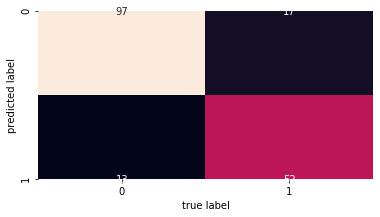

In [80]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Above all this gives better results.

Lets try GAUSSIAN NAIVE BAYES......

In [81]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8212290502793296

Text(33.0, 0.5, 'predicted label')

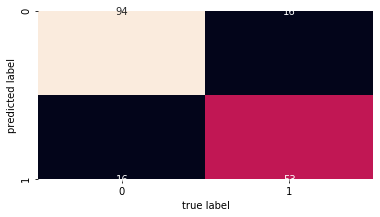

In [82]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Gaussian naive bayes also does same prediction as random forest.

Let us see KNEIGHBORS......

In [83]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.7988826815642458

In [84]:
param_grid={'n_neighbors':[4,5,6,7,8],'algorithm':['ball_tree','kd_tree','brute'],'p':[1,2]}
grid_knn=GridSearchCV(knn,param_grid,cv=5)
grid_knn.fit(X_train,y_train)
y_pred=grid_knn.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(grid_knn.best_params_)

0.7877094972067039
{'algorithm': 'brute', 'n_neighbors': 6, 'p': 1}


Text(33.0, 0.5, 'predicted label')

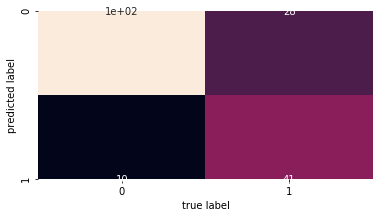

In [85]:
mat=confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

It does poor compared to all above done classifier.

Overall we come to the conclusion that SUPPORT VECTOR MACHINE performs well on the training data with fine tuned hyperparameters.

# 6.Precision,Recall,F1 score
Lets calculate the precision,recall,f1 score of our chosen classifier on the performed data

In [86]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())    
    print('Standard Deviation:',scores.std()) 

In [87]:
svc_clf=SVC(kernel='rbf',random_state=42,C=2,degree=2,gamma='auto')
scores=cross_val_score(svc_clf,X_train,y_train,cv=3,scoring='accuracy')
display_scores(scores)

Scores: [0.81932773 0.83544304 0.8185654 ]
Mean: 0.8244453899703341
Standard Deviation: 0.0077827365826613915


We can see that how our classifier have performed in cross validation .
Let us see precision,recall,f1 score.

In [88]:
y_scores=cross_val_predict(svc_clf,X_train,y_train,method='decision_function')

In [89]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.803921568627451
0.5942028985507246
0.6833333333333333


We got about 80% precision and only 59% recall. Precision here means among the classifier predicted the survivors it tend to correctly predict 80% of them as survived and also predicted 20% as suvived but they are dead. Recall means the actula ratio of how much the classifier must predict that the passenger survived.(i.e here the classifier correctly predicted only 59% of total survivors).
Let us see what will be the recall score if the threshold is increased so that the precision is 90%.

In [90]:
precisions,recalls,thresholds=precision_recall_curve(y_train,y_scores)

In [91]:
threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]

In [92]:
y_train_pred_90=(y_scores>=threshold_90_precision)

In [93]:
precision_score(y_train,y_train_pred_90)

0.9027027027027027

In [94]:
recall_score(y_train,y_train_pred_90)

0.6117216117216118

In [95]:
threshold_90_precision

0.8925632897417074

Let's cross validate and see the accuracy for the overall data we made in the preprocessing part-2.0

In [96]:
svc_clf=SVC(kernel='rbf',random_state=42,C=2,degree=2,gamma='auto')
scores=cross_val_score(svc_clf,preprocess_feature,preprocess_label,cv=3,scoring='accuracy')
display_scores(scores)

Scores: [0.81818182 0.84175084 0.83501684]
Mean: 0.8316498316498316
Standard Deviation: 0.009912189524498138


Good prediction in cross validation.

# 7.Predicting the test data
Before doing prediction we need to preprocess the data as we did for training data. 

In [97]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [99]:
test_data.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

The preprocess can be done simply by defining a class with fit,transform and fit_transform method. Transform the data by passing it to the class.

In [100]:
def get_age(val):
    age_classification={'Child':range(0,13),
                        'Teen':range(13,21),
                        'Young':range(21,31),
                        '30_adult':range(31,41),
                        '40_adult':range(41,51),
                        'Elderly':range(51,90)}
    for key,value in age_classification.items():
        if val in value:
            return key
def get_title(val):
    words=val.split()
    title={'Officer':['Capt.','Col.','Major.','Dr.','Rev.'],
          'Royalty':['Jonkheer.','Don.','Sir.','the Countess.','Lady.'],
          'Mrs':['Mme.','Ms.','Mrs.'],
          'Mr':['Mr.'],
          'Miss':['Mlle.','Miss.'],
          'Master':['Master.']}
    for key,value in title.items():
        for word in words:
            if word in value:
                return str(key)
def fam_size(val):
    fam={'Single':[1],
        'Small_family':[2,3,4],
        'large_family':[5,6,7,8,9,10,11]}
    for key,value in fam.items():
        if val in value:
            return key
def most_common(lst):
    data=Counter(lst)
    return data.most_common(1)[0][0]

In [101]:
from sklearn.base import BaseEstimator,TransformerMixin
class CombinedWorks(BaseEstimator,TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        from sklearn.preprocessing import OrdinalEncoder
        from sklearn.preprocessing import StandardScaler
        oe=OrdinalEncoder()
        scale=StandardScaler()
        mean_age=X['Age'].mean()
        mean_fare=X['Fare'].mean()
        X['Age'].fillna(mean_age,inplace=True)
        X['Fare'].fillna(mean_fare,inplace=True)
        PassengerId=X['PassengerId']
        X.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)
        X['Title']=np.NAN
        X['Age']=np.ceil(X['Age'])
        X['Fam_mem']=X['SibSp']+X['Parch']+1
        for i in range(len(X)):
            X['Age'][i]=('{}'.format(get_age(X['Age'][i])))  
            X['Title'][i]=get_title(X['Name'][i])
            X['Fam_mem'][i]=fam_size(X['Fam_mem'][i])
        frequent=most_common(X['Title'])
        X['Title'].fillna(frequent,inplace=True)
        X[['Embarked','Sex','Age','Title','Fam_mem']]=oe.fit_transform(X[['Embarked','Sex','Age','Title','Fam_mem']])
        X=pd.get_dummies(X,columns=['Pclass','Sex','Age','Embarked','Title','Fam_mem'])
        X[['Fare']]=scale.fit_transform(X[['Fare']])
        name=X['Name']
        X.drop(['SibSp','Parch','Name'],axis=1,inplace=True)
        return X,name,oe.categories_,PassengerId

In [102]:
cw=CombinedWorks()
test_data,Name,catagories,passenger_id=cw.fit_transform(test_data)

In [103]:
test_data.head()

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0.0,Sex_1.0,Age_0.0,Age_1.0,Age_2.0,Age_3.0,...,Embarked_1.0,Embarked_2.0,Title_0.0,Title_1.0,Title_2.0,Title_3.0,Title_4.0,Fam_mem_0.0,Fam_mem_1.0,Fam_mem_2.0
0,-0.498407,0,0,1,0,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
1,-0.513274,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,-0.465088,0,1,0,0,1,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
3,-0.483466,0,0,1,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,-0.418471,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


Now we can see that the test data has been modified and lets see if there are all the feature value that were in train data.

In [104]:
catagories

[array(['C', 'Q', 'S'], dtype=object),
 array(['female', 'male'], dtype=object),
 array(['30_adult', '40_adult', 'Child', 'Elderly', 'Teen', 'Young'],
       dtype=object),
 array(['Master', 'Miss', 'Mr', 'Mrs', 'Officer'], dtype=object),
 array(['Single', 'Small_family', 'large_family'], dtype=object)]

We can see that the test data has no member related to the title 'Royalty'. Now lets remove the uncorrelated data as in the training data

In [105]:
test_data.drop(['Age_0.0','Embarked_1.0','Age_1.0','Age_4.0','Age_3.0','Title_4.0','Age_5.0',
                'Title_0.0','Pclass_2'],axis=1,inplace=True)

In [106]:
test_data.shape

(418, 14)

Let's fit the training data to the fine tuned classifier and predict the result

In [107]:
svc_clf=SVC(kernel='rbf',random_state=42,C=2,degree=2,gamma='auto')
svc_clf.fit(preprocess_feature,preprocess_label)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [108]:
y_pred=svc_clf.predict(test_data)

In [109]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [110]:
prediction=np.c_[Name,y_pred]

In [111]:
for i in range(len(test_data)):
    if prediction[i][1]==1:
        prediction[i][1]='Yes'
    else:
        prediction[i][1]='No'

In [112]:
for i in range(len(test_data)):
    print('Name:{0}\t\tSurvived:{1}'.format(prediction[i][0],prediction[i][1]))

Name:Kelly, Mr. James		Survived:No
Name:Wilkes, Mrs. James (Ellen Needs)		Survived:Yes
Name:Myles, Mr. Thomas Francis		Survived:No
Name:Wirz, Mr. Albert		Survived:No
Name:Hirvonen, Mrs. Alexander (Helga E Lindqvist)		Survived:Yes
Name:Svensson, Mr. Johan Cervin		Survived:No
Name:Connolly, Miss. Kate		Survived:Yes
Name:Caldwell, Mr. Albert Francis		Survived:No
Name:Abrahim, Mrs. Joseph (Sophie Halaut Easu)		Survived:Yes
Name:Davies, Mr. John Samuel		Survived:No
Name:Ilieff, Mr. Ylio		Survived:No
Name:Jones, Mr. Charles Cresson		Survived:No
Name:Snyder, Mrs. John Pillsbury (Nelle Stevenson)		Survived:Yes
Name:Howard, Mr. Benjamin		Survived:No
Name:Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)		Survived:Yes
Name:del Carlo, Mrs. Sebastiano (Argenia Genovesi)		Survived:Yes
Name:Keane, Mr. Daniel		Survived:No
Name:Assaf, Mr. Gerios		Survived:No
Name:Ilmakangas, Miss. Ida Livija		Survived:Yes
Name:Assaf Khalil, Mrs. Mariana (Miriam")"		Survived:Yes
Name:Rothschild, Mr. Martin		Survi

And now we got the predicted values of those who were in the board. Atlast we did it. We made a lot way gaining a lot of intution about the data and finally making a good prediction. Thank you for travelling with me. :-)